 # Computing Surfaces, Volumes, and Packing Properties

## Run the calculation

We proceed as follows, using as an example  PDB id 1vfb.pdb:
* Call the sbl executable to perform the calculation
* Dump the main log file, which contains human readble information on the calculation: number of atoms processed, total surface area of exposed atoms, total volume of the molecular model, etc. 

Note that statistics on a per atom basis are dumped in an xml file. 
A finer exploitation of these  statistics on a per atom basis is provided below.


In [1]:
import re  #regular expressions
import sys #misc system
import os
import pdb
import shutil # python 3 only
print("Marker : Calculation Started")

#input filename  and output directory
ifname = "data/1vfb.pdb"
odir = "results"
if not os.path.exists(odir):    
    os.system( ("mkdir %s" % odir) )

# check executable exists and is visible
exe = shutil.which("sbl-vorlume-pdb.exe")
print( ("Using executable %s\n" % exe) )

# run command
cmd = "%s -f %s --directory %s --verbose --output-prefix --log --boundary-viewer vmd" % (exe,ifname,odir)
os.system(cmd)

# list output files
cmd = "ls %s" % odir
ofnames = os.popen(cmd).readlines()
print("\nAll output files:",ofnames)

# find the log file and display log file
cmd = "find %s -name *log.txt" % odir
lfname = os.popen(cmd).readlines()[0].rstrip()
print("\nLog file is:", lfname)
#log = open(lfname).readlines()
# for line in log:         print(line.rstrip())
print("Marker : Calculation Ended")


Marker : Calculation Started
Using executable /user/nniclaus/home/miniconda3/envs/sbl-demo/bin/sbl-vorlume-pdb.exe


All output files: ['sbl-vorlume-pdb__annotated_names___atomic_group_radii___f_1vfb__alpha_0__log.txt\n', 'sbl-vorlume-pdb__annotated_names___atomic_group_radii___f_1vfb__alpha_0__residues_volume.xml\n', 'sbl-vorlume-pdb__annotated_names___atomic_group_radii___f_1vfb__alpha_0__surface_volumes.xml\n', 'sbl-vorlume-pdb__radius_water_1dot4__f_1vfb__alpha_0__sample_eps_1__alpha_complex.xml\n', 'sbl-vorlume-pdb__radius_water_1dot4__f_1vfb__alpha_0__sample_eps_1__boundary.vmd\n', 'sbl-vorlume-pdb__radius_water_1dot4__f_1vfb__alpha_0__sample_eps_1__log.txt\n', 'sbl-vorlume-pdb__radius_water_1dot4__f_1vfb__alpha_0__sample_eps_1__residues_volume.xml\n', 'sbl-vorlume-pdb__radius_water_1dot4__f_1vfb__alpha_0__sample_eps_1__surface_volumes.xml\n', 'sbl-vorlume-txt__f_spheres__alpha_0__log.txt\n', 'sbl-vorlume-txt__f_spheres__alpha_0__surface_volumes.xml\n']

Log file is: results/sbl-

## Extract statistics on a per atom basis, with PALSE

We now use the package PALSE , see 
https://sbl.inria.fr/doc/PALSE-user-manual.html , 
to collect all volumes and surface areas, on a per atom basis. 

In [2]:
from SBL.PALSE import *
print("Marker : Calculation Started")

# create a DB of xml output files
database = PALSE_xml_DB()
database.load_from_directory("results",".*volumes.xml")

# from the XML files, retrive the  volume of atomic restrictions and compute the average
volumes = database.get_all_data_values_from_database("restrictions/item/total_volume", float)
volumes = PALSE_DS_manipulator.convert_listoflists_to_list(volumes)
ave_volume = sum(volumes)/float(len(volumes))
print( ("Average volume of atomic restrictions: %s" % ave_volume) )

# from the XML files, retrive the  surface areas of atomic restrictions and compute the average
areas = database.get_all_data_values_from_database("restrictions/item/total_area", float)
areas = PALSE_DS_manipulator.convert_listoflists_to_list(areas)
ave_area = sum(areas)/float(len(areas))
print( ("Average surface area of atomic restrictions: %s" % ave_volume) )
print("Marker : Calculation Ended")


ModuleNotFoundError: No module named 'Bio'

## Plot the distribition of surface areas of   atomic restrictions
The list of areas can be used to inspect the distribution of surface areas on a per atom basis:

Marker : Calculation Started
Marker : Calculation Ended


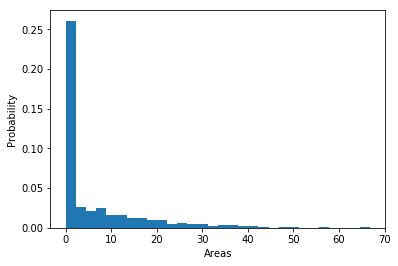

In [4]:
import matplotlib.pyplot as plt
import numpy as np
print("Marker : Calculation Started")

plt.hist(areas, density=1, bins=30) 
plt.xlabel('Areas')
plt.ylabel('Probability')
print("Marker : Calculation Ended")


## Plot the distribution of volumes of atomic restrictions
Likewise, one can plot the distribution of volumes of Voronoi restrictions:

Marker : Calculation Started
Marker : Calculation Ended


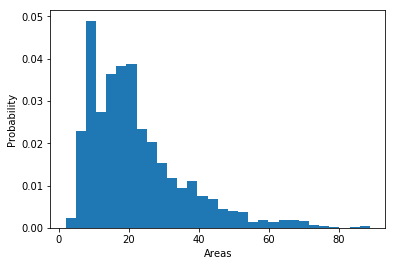

In [5]:
print("Marker : Calculation Started")
plt.hist(volumes, density=1, bins=30) 
plt.xlabel('Areas')
plt.ylabel('Probability')
print("Marker : Calculation Ended")
